In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns

In [2]:
shark_ori= pd.read_csv('src/attacks.csv', encoding='latin1') 

In [3]:
shark_ori.shape

(25723, 24)

In [4]:
shark_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
pd.set_option('display.max_columns', None)
shark_ori

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_rows', None)

In [7]:
#vemos el % de nulos
nan_cols=shark_ori.isna().mean()*100
nan_cols[nan_cols>0]

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

In [8]:
nan_cols=shark_ori.isna().mean()*100
nan_cols[nan_cols>80]

Age            86.506240
Time           88.539439
Species        86.533453
Unnamed: 22    99.996112
Unnamed: 23    99.992225
dtype: float64

In [9]:
shark_1=shark_ori.copy()

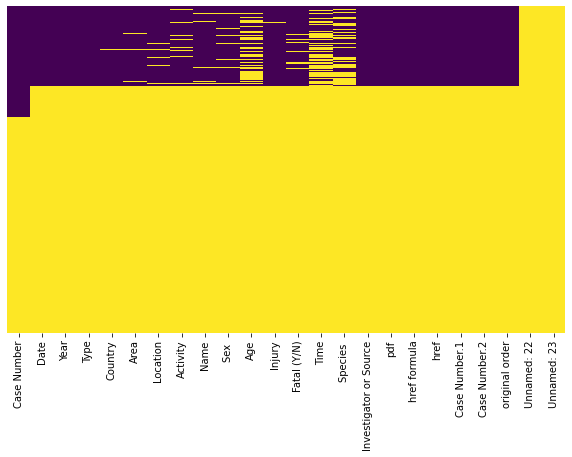

In [10]:
# grafico de nulos en el dataframe

plt.figure(figsize=(10, 6))  

sns.heatmap(shark_1.isna(),  
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [11]:
shark_1.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [12]:
#eliminamos aquellas filas donde tengan nulos en todas las columnas
shark_1.dropna(subset=['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'], inplace=True, how='all') 

In [13]:
shark_1.shape, shark_ori.shape

((8703, 24), (25723, 24))

In [14]:
shark_1.duplicated().any()

True

In [15]:
#eliminimanos duplicados
shark_1.drop_duplicates(inplace=True)
shark_1.shape

(6311, 24)

In [16]:
shark_1.shape, shark_ori.shape

((6311, 24), (25723, 24))

In [17]:
#eliminamos estas 2 columnas. No aportan información. casi el 100% son nulos
shark_1.drop(columns=['Unnamed: 23', 'Unnamed: 22'], inplace=True)

In [18]:
shark_1.shape, shark_ori.shape

((6311, 22), (25723, 24))

In [19]:
nan_cols_1=shark_1.isna().mean()*100
nan_cols_1[nan_cols_1>0]

Case Number                0.015845
Date                       0.142608
Year                       0.174299
Type                       0.205990
Country                    0.934876
Area                       7.352242
Location                   8.699097
Activity                   8.762478
Name                       3.470132
Sex                        9.095231
Age                       45.000792
Injury                     0.586278
Fatal (Y/N)                8.683251
Time                      53.287910
Species                   45.111710
Investigator or Source     0.411979
pdf                        0.142608
href formula               0.158453
href                       0.142608
Case Number.1              0.142608
Case Number.2              0.142608
original order             0.031691
dtype: float64

In [20]:
#cambiamos de nombre a las columnas

In [21]:
shark_1.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [22]:
shark_1=shark_1.rename(columns={k:v for k,v in zip(shark_1.columns, [c.upper().replace(' ', '') for c in shark_1.columns])})

In [23]:
shark_1['TYPE'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: TYPE, dtype: int64

In [24]:
# Renombro los valores en la columna Type para una mejor interpretacion.
shark_1['TYPE'].replace({'Boating':'Boat','Boatomg':'Boat', 'Questionable':'Unknown'}, inplace = True)
# Reemplazp los null con Unknown
shark_1['TYPE'].fillna('Unknown', inplace = True)
shark_1['TYPE'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Boat             341
Sea Disaster     239
Unknown           15
Name: TYPE, dtype: int64

In [25]:
shark_1.TYPE.unique()

array(['Boat', 'Unprovoked', 'Invalid', 'Provoked', 'Unknown',
       'Sea Disaster'], dtype=object)

In [26]:
nan_cols2=shark_1.isna().sum()
nan_cols2[nan_cols2>0]

CASENUMBER                 1
DATE                       9
YEAR                      11
COUNTRY                   59
AREA                     464
LOCATION                 549
ACTIVITY                 553
NAME                     219
SEX                      574
AGE                     2840
INJURY                    37
FATAL(Y/N)               548
TIME                    3363
SPECIES                 2847
INVESTIGATORORSOURCE      26
PDF                        9
HREFFORMULA               10
HREF                       9
CASENUMBER.1               9
CASENUMBER.2               9
ORIGINALORDER              2
dtype: int64

In [27]:
# filas con valor nulo
bad_index=shark_1.COUNTRY[shark_1.COUNTRY.isna()].index

bad_index

Int64Index([   62,   525,  2956,  3378,  3387,  3388,  3395,  3399,  3425,
             3605,  3661,  4018,  4231,  4266,  4498,  4639,  4700,  4712,
             4726,  4729,  4911,  5020,  5060,  5425,  5586,  5587,  5612,
             5636,  5742,  5770,  5808,  5810,  5839,  5885,  5920,  5996,
             6001,  6092,  6119,  6131,  6133,  6137,  6155,  6165,  6171,
             6175,  6177,  6199,  6206,  6259,  6302,  6303,  6304,  6305,
             6306,  6307,  6308,  6309, 25722],
           dtype='int64')

In [28]:
#los datos de area, country y location que sean null ponemos Unknown
shark_1['AREA'].fillna('Unknown', inplace = True)
shark_1['COUNTRY'].fillna('Unknown', inplace = True)
shark_1['LOCATION'].fillna('Unknown', inplace = True)

In [29]:
nan_cols2=shark_1.isna().sum()
nan_cols2[nan_cols2>0]

CASENUMBER                 1
DATE                       9
YEAR                      11
ACTIVITY                 553
NAME                     219
SEX                      574
AGE                     2840
INJURY                    37
FATAL(Y/N)               548
TIME                    3363
SPECIES                 2847
INVESTIGATORORSOURCE      26
PDF                        9
HREFFORMULA               10
HREF                       9
CASENUMBER.1               9
CASENUMBER.2               9
ORIGINALORDER              2
dtype: int64

In [30]:
shark_1.COUNTRY.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'Unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 

In [31]:
import re

In [32]:
#limpiamos columna COUNTRY eliminando en este caso los '?'
def limpiar_country(COUNTRY):
    COUNTRY=re.findall('\w+', COUNTRY)
    COUNTRY=' '.join(COUNTRY)
    return COUNTRY

In [33]:
shark_1.COUNTRY=shark_1.COUNTRY.apply(limpiar_country)

In [34]:
#shark_1['COUNTRY'].value_counts

In [35]:
#shark_1['CASENUMBER'].value_counts()

In [36]:
#hacemos segunda copia del data
shark_2=shark_1.copy()

In [37]:
shark_2.head()

,CASENUMBER,DATE,YEAR,TYPE,COUNTRY,AREA,LOCATION,ACTIVITY,NAME,SEX,AGE,INJURY,FATAL(Y/N),TIME,SPECIES,INVESTIGATORORSOURCE,PDF,HREFFORMULA,HREF,CASENUMBER.1,CASENUMBER.2,ORIGINALORDER
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [38]:
bad_index=shark_2.CASENUMBER[shark_2.CASENUMBER.isna()].index

bad_index[:10]

Int64Index([5488], dtype='int64')

In [39]:
shark_2['CASENUMBER'].fillna('Unknown', inplace = True)

In [40]:
bad_index=shark_2.CASENUMBER[shark_2.CASENUMBER.isna()].index

bad_index[:10]

Int64Index([], dtype='int64')

In [41]:
#Nos fijamos que las 3 primeras columnas nos da la misma información.
#Vamos a convertir la columna “DATE” en el ID de los casos
new_index=[]
for i in range(len(shark_2['DATE'])):
    new_index.append(i)



In [42]:
shark_2['DATE'] = new_index

In [43]:
#vamos a limpiar la columna de CASENUMBER, para que solo se queden las fechas en el formato YYYY.MM.DD
import re
def limpiar_date(CASENUMBER): 
    CASENUMBER = re.findall('\d+.\d+.\d+', CASENUMBER)
    CASENUMBER = ''.join(CASENUMBER)
    return CASENUMBER


In [44]:
shark_2['CASENUMBER'] = shark_2['CASENUMBER'].apply(limpiar_date)

In [45]:
shark_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CASENUMBER            6311 non-null   object 
 1   DATE                  6311 non-null   int64  
 2   YEAR                  6300 non-null   float64
 3   TYPE                  6311 non-null   object 
 4   COUNTRY               6311 non-null   object 
 5   AREA                  6311 non-null   object 
 6   LOCATION              6311 non-null   object 
 7   ACTIVITY              5758 non-null   object 
 8   NAME                  6092 non-null   object 
 9   SEX                   5737 non-null   object 
 10  AGE                   3471 non-null   object 
 11  INJURY                6274 non-null   object 
 12  FATAL(Y/N)            5763 non-null   object 
 13  TIME                  2948 non-null   object 
 14  SPECIES               3464 non-null   object 
 15  INVESTIGATORORSOURCE

#vamos a sustituir los datos de las columnas de DATE,YEAR,CASENUMBER.1 Y CASENUMBER.2 con los datos de la columna CASENUMBER

In [46]:
shark_2.DATE=shark_2.CASENUMBER  
shark_2.YEAR=shark_2.CASENUMBER
shark_2.CASENUMBER2=shark_2.CASENUMBER
shark_2.CASENUMBER2=shark_2.CASENUMBER

In [47]:
shark_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CASENUMBER            6311 non-null   object 
 1   DATE                  6311 non-null   object 
 2   YEAR                  6311 non-null   object 
 3   TYPE                  6311 non-null   object 
 4   COUNTRY               6311 non-null   object 
 5   AREA                  6311 non-null   object 
 6   LOCATION              6311 non-null   object 
 7   ACTIVITY              5758 non-null   object 
 8   NAME                  6092 non-null   object 
 9   SEX                   5737 non-null   object 
 10  AGE                   3471 non-null   object 
 11  INJURY                6274 non-null   object 
 12  FATAL(Y/N)            5763 non-null   object 
 13  TIME                  2948 non-null   object 
 14  SPECIES               3464 non-null   object 
 15  INVESTIGATORORSOURCE

In [48]:
shark_2['FATAL(Y/N)'].fillna('Unknown', inplace = True)

In [49]:
shark_2['FATAL(Y/N)'].unique()

array(['N', 'Y', 'Unknown', 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [50]:
#De la columna FATAL(Y/N) vamos a renombrar aquellos valores que sean diferentes a Y o N
new_fatal=[]
for e in shark_2['FATAL(Y/N)']:
    
    if 'M' in e:
        e =e.replace('M', 'N/A')
        new_fatal.append(e)
    elif 'Unknown' in e:
        e =e.replace('Unknown' ,'N/A')
        new_fatal.append(e)
    elif 'UNKNOWN' in e:
        e =e.replace('UNKNOWN' ,'N/A')
        new_fatal.append(e)
    elif '2017' in e:
        e =e.replace('2017' ,'N/A')
        new_fatal.append(e)
    elif ' N' in e:
        e =e.replace(' N' ,'N')
        new_fatal.append(e)
    elif 'N ' in e:
        e =e.replace('N ' ,'N')
        new_fatal.append(e)
    elif 'y' in e:
        e =e.replace('y', 'Y')
        new_fatal.append(e)
    else:
        new_fatal.append(e)
len(new_fatal)



6311

In [51]:
shark_2['FATAL(Y/N)'] = new_fatal

In [52]:
shark_2['FATAL(Y/N)'].unique()

array(['N', 'Y', 'N/A'], dtype=object)

In [53]:
def limpiaractividades(x):
    dicc_actividades = {"Fishing":re.search(".*[Ff](ishing|ISHING).*",str(x)),
                    "Swimming":re.search(".*[Ss](wimming|WIMMing).*",str(x)),
                    "Kite":re.search(".*[Kk](ite|ITE).*",str(x)),
                    "Walking":re.search(".*[Ww](alking|ALKING).*",str(x)),
                    "Boogie Board":re.search(".*[Bb](oogie|OOGIE).*",str(x)),
                    "Body Boarding":re.search(".*[Bb](ody|ODY).*",str(x)),
                    "Wind Surfing":re.search(".*[wW](ind|IND).*",str(x)),
                    "Boat":re.search(".*[Bb](oat|OAT).*",str(x)),
                    "Interact with sharks":re.search(".*[Ss](hark|HARK).*",str(x)),
                    "Diving":re.search(".*[Dd](iving|IVING).*",str(x)),
                    "Standing in water":re.search(".*[Ss](tand|TAND).*",str(x)),
                    "Paddling":re.search(".*[Pp](addl|ADDL).*",str(x)),
                    "Bathing":re.search(".*[Bb](athing|ATHING).*",str(x)),
                    "OverBoard":re.search(".*[Oo](verb|VERB).*",str(x)),
                    "Bathing":re.search(".*[Bb](athing|ATHING).*",str(x)),
                    "Floating":re.search(".*[Ff](loat|LOAT).*",str(x)),
                    "Jumping":re.search(".*[Jj](ump|UMP).*",str(x))}
    for key,values in dicc_actividades.items():
        if values:
            return key
    return "other"


In [54]:
shark_2["ACTIVITY"] = shark_2["ACTIVITY"].apply(limpiaractividades)

In [55]:
shark_2.ACTIVITY.unique()

array(['Paddling', 'Standing in water', 'other', 'Diving', 'Kite',
       'Swimming', 'Fishing', 'Walking', 'Interact with sharks',
       'Boogie Board', 'Body Boarding', 'Wind Surfing', 'Boat', 'Bathing',
       'Floating', 'Jumping', 'OverBoard'], dtype=object)

In [56]:
shark_2.SEX.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [57]:
shark_2['SEX'].fillna('Unknown', inplace = True)

In [58]:
shark_2.SEX.unique()

array(['F', 'M', 'Unknown', 'M ', 'lli', 'N', '.'], dtype=object)

In [59]:
sex_type = []
for e in shark_2['SEX']:
    if 'M ' in e:
        e =e.replace('M ', 'M')
        sex_type.append(e)
    elif 'N' in e:
        e =e.replace('N' ,'Unknown')
        sex_type.append(e)
    elif 'lli' in e:
        e=e.replace('lli','Unknown')
        sex_type.append(e)
    elif '.' in e:
        e=e.replace('.','Unknown')
        sex_type.append(e)
    else:
        sex_type.append(e)

In [60]:
shark_2['SEX'] = sex_type

In [61]:
shark_2.SEX.unique()

array(['F', 'M', 'Unknown'], dtype=object)

In [62]:
#shark_2['NAME']

In [63]:
shark_2['NAME'].fillna('Unknown', inplace = True)

In [64]:
name_type = []
for e in shark_2['NAME']:
    if 'male' in e:
        e =e.replace('male', 'Unknown')
        name_type.append(e)
    elif 'female' in e:
        e =e.replace('female' ,'Unknown')
        name_type.append(e)
    else:
        name_type.append(e)

In [65]:
shark_2['NAME'] = name_type

In [66]:
#columna AGE
shark_2['AGE'].fillna('Unknown', inplace = True)

In [67]:
shark_2.AGE.unique()

array(['57', '11', '48', 'Unknown', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20',
       '24', '26', '49', '22', '7', '31', '17', '40', '13', '42', '3',
       '8', '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 3

In [68]:
age_type = []
for e in shark_2['AGE']:
    if 'Teen' in e:
        e =e.replace('Teen', '30')
        age_type.append(e)
    elif '18 months' in e:
        e =e.replace('18 months' ,'2')
        age_type.append(e)
    elif 'teen' in e:
        e=e.replace('teen','30')
        age_type.append(e)
    elif 'Teens' in e:
        e=e.replace('Teens','30')
        age_type.append(e)
    elif 'young' in e:
        e=e.replace('young','20')
        age_type.append(e)
    elif 'adult' in e:
        e=e.replace('adult','49')
        age_type.append(e)
        
    elif 'elderly' in e:
        e=e.replace('elderly','70')
        age_type.append(e)
        
    elif 'middle' in e :
        e=e.replace('middle','50')
        age_type.append(e)
        
    elif '18 months' in e:
        e=e.replace('18months','1.5')
        age_type.append(e)
       
    elif '9 months' in e:
        e=e.replace('9months','0.75')
        age_type.append(e)
       
    elif '2 to 3months' in e:
        e=e.replace('2 to 3months','0.2')
        age_type.append(e)
        
       
    else:
         age_type.append(e)
       

In [69]:
shark_2['AGE'] = age_type

In [70]:
shark_2.AGE.unique()

array(['57', '11', '48', 'Unknown', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20',
       '24', '26', '49', '22', '7', '31', '17', '40', '13', '42', '3',
       '8', '50', '16', '82', '73', '20s', '68', '51', '39', '58', '47',
       '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6', '27',
       '64', '23', '71', '44', '62', '63', '70', '2', '53', '30s', '50s',
       '77', '74', '28 & 26', '5', '86', '18 or 20', '12 or 13',
       '46 & 34', '28, 23 & 30', '36 & 26', '8 or 10', '84', '\xa0 ', ' ',
       '30 or 36', '6½', '21 & ?', '75', '33 or 37', 'mid-30s', '23 & 20',
       ' 30', '7      &    31', ' 28', '20?', "60's", '32 & 30',
       '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33', '74 ',
       '45 ', '21 or 26', '20 ', '>50', '18 to 22', '9 & 12', '? & 19',
       '9 months', '25 to 35', '23 & 26', '1', '(49)', '33 & 37',
   

In [71]:
shark_2.INJURY.unique()

array(['No injury to occupant, outrigger canoe and paddle damaged',
       'Minor injury to left thigh',
       'Injury to left lower leg from surfboard skeg', ...,
       'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [72]:
shark_2[["FATAL(Y/N)","INJURY"]].sample(5)

,FATAL(Y/N),INJURY
636,N,Lacerations to left forearm
39,N,The shark & man simply collided; neither were...
4665,Y,"Of the 1,429 people on board, only 448 survive..."
5257,N,Abdomen bitten
6067,N,Arms & legs severed


In [73]:
#tomamos la decision de cambiar todas aquellas frases que aparezca la palabra fatal e incluya tb en la frase la palabra
#'non' a 'fatal', el restos lo dejamos en no injuri y injury.

def injurys (string):
    x = str(string).lower() 
    if "fatal" in x and "non" not in x:
        return "fatal"
    elif "no injury" in x or "not injured" in x:
        return "no injury"
    else:
        return "injury"



In [74]:
shark_2["INJURY"] = shark_2["INJURY"].apply(injurys)

In [75]:
shark_2.INJURY.unique()

array(['no injury', 'injury', 'fatal'], dtype=object)

In [76]:
shark_2[["FATAL(Y/N)","INJURY"]].sample(5)

,FATAL(Y/N),INJURY
432,N,no injury
5495,Y,fatal
4993,Y,fatal
5196,N/A,fatal
2061,N,injury


In [77]:
shark_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CASENUMBER            6311 non-null   object 
 1   DATE                  6311 non-null   object 
 2   YEAR                  6311 non-null   object 
 3   TYPE                  6311 non-null   object 
 4   COUNTRY               6311 non-null   object 
 5   AREA                  6311 non-null   object 
 6   LOCATION              6311 non-null   object 
 7   ACTIVITY              6311 non-null   object 
 8   NAME                  6311 non-null   object 
 9   SEX                   6311 non-null   object 
 10  AGE                   6311 non-null   object 
 11  INJURY                6311 non-null   object 
 12  FATAL(Y/N)            6311 non-null   object 
 13  TIME                  2948 non-null   object 
 14  SPECIES               3464 non-null   object 
 15  INVESTIGATORORSOURCE

In [78]:
#eliminamos nulos en la columna TIME
shark_2['TIME'].fillna('Unknown', inplace = True)

In [79]:
shark_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CASENUMBER            6311 non-null   object 
 1   DATE                  6311 non-null   object 
 2   YEAR                  6311 non-null   object 
 3   TYPE                  6311 non-null   object 
 4   COUNTRY               6311 non-null   object 
 5   AREA                  6311 non-null   object 
 6   LOCATION              6311 non-null   object 
 7   ACTIVITY              6311 non-null   object 
 8   NAME                  6311 non-null   object 
 9   SEX                   6311 non-null   object 
 10  AGE                   6311 non-null   object 
 11  INJURY                6311 non-null   object 
 12  FATAL(Y/N)            6311 non-null   object 
 13  TIME                  6311 non-null   object 
 14  SPECIES               3464 non-null   object 
 15  INVESTIGATORORSOURCE

In [80]:
shark_2.SPECIES.sample(8)

4570                                   Possibly C. leucas
623                                              3' shark
3916    Grey reef shark, 1.8 m [6'] grey reef shark, i...
3408                                                  NaN
3730                                                  NaN
2207                                                  NaN
4611                                                  NaN
2254                                Possibly a sand shark
Name: SPECIES, dtype: object

In [81]:
shark_2['SPECIES'].fillna('Unknown', inplace = True)

In [82]:
shark_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CASENUMBER            6311 non-null   object 
 1   DATE                  6311 non-null   object 
 2   YEAR                  6311 non-null   object 
 3   TYPE                  6311 non-null   object 
 4   COUNTRY               6311 non-null   object 
 5   AREA                  6311 non-null   object 
 6   LOCATION              6311 non-null   object 
 7   ACTIVITY              6311 non-null   object 
 8   NAME                  6311 non-null   object 
 9   SEX                   6311 non-null   object 
 10  AGE                   6311 non-null   object 
 11  INJURY                6311 non-null   object 
 12  FATAL(Y/N)            6311 non-null   object 
 13  TIME                  6311 non-null   object 
 14  SPECIES               6311 non-null   object 
 15  INVESTIGATORORSOURCE

Vamos a limpiar la columna Species. De un primer vistazo vemos que esta desordenada. Vamos a acotar y categorizar
los tipos de especies. 
En la columna 'HREF' vemos la pagina 'https://sharkattackfile.net/species.htm' que nos muestra las especies que mas están envueltas en los ataques.

In [83]:

shark_2["SPECIES"].value_counts().sample(8)

14' to 16' white shark                  1
 Grey nurse shark,  3 m [10']           1
Bull shark or lemon shark               1
1.5 m [5'] blacktip shark               1
White shark, 7'                         1
2 m to 2.5 m [6.75'  to 8.25'] shark    2
Tiger shark, 14'                        4
Tiger shark, 3 to 4 m [10' to 13']      1
Name: SPECIES, dtype: int64

In [84]:

def column_species (string):
    x = str(string).lower()
    if "white" in x or "White" in x:
        return "white"
    elif "tiger" in x or "Tiger" in x:
        return "tiger"
    elif "bull" in x or "Bull"in x:
        return "bull"
    elif "mako" in x or "shortfin"in x:
        return "mako"
    elif "lemon" in x or "Lemon"in x:
        return "lemon"
    elif "oceanic" in x or "whitetip" in x:
        return "whitetip reef"
    elif "blue" in x:
        return "blue"   
    elif "nurse" in x:
        return "nurse"
    elif "caribbean" in x:
        return "caribbean reef" 
    elif "blacktail" in x or "blacktip" in x:
        return "blacktip"
    elif "grey" in x or "gray" in x:
        return "grey reef shark"
    elif "wobbegong" in x:
        return "wobbegong"   
    elif "spinner" in x:
        return "spinner"    
    elif "galapagos" in x:
        return "galapagos"
    elif "hammerhead" in x:
        return "hammerhead"   
    elif "sandbar" in x:
        return "sand tiger"    
    elif "silky" in x:
        return "silky"
    elif "whaler" in x:
        return "bronze whaler"
    elif "sevengill " in x:
        return "broadnose sevengill"
    elif "unconfirmed" in x or "questionable " in x:
        return "Unknown"
    else:
        return "Unknown"

In [85]:
shark_2["SPECIES"] = shark_2["SPECIES"].apply(column_species)

In [86]:
#Observamos que el tiburón blanco es la especie que más ataca
shark_2["SPECIES"].value_counts()

Unknown                4577
white                   667
tiger                   283
bull                    178
blacktip                101
nurse                    96
bronze whaler            70
blue                     56
mako                     55
wobbegong                50
hammerhead               48
lemon                    34
grey reef shark          29
spinner                  21
caribbean reef           17
broadnose sevengill      13
galapagos                 7
sand tiger                5
silky                     4
Name: SPECIES, dtype: int64

In [87]:
#El resto de columnas  no nos interesa para nuestro analisis. Todos los non.null los pasamos a Unknown

In [88]:
shark_2['HREF'].fillna('Unknown', inplace = True)

In [89]:
shark_2['INVESTIGATORORSOURCE'].fillna('Unknown', inplace = True)

In [90]:
shark_2['PDF'].fillna('Unknown', inplace = True)

In [91]:
shark_2['HREFFORMULA'].fillna('Unknown', inplace = True)

In [92]:
shark_2['ORIGINALORDER'].fillna('Unknown', inplace = True)

In [93]:
shark_2['CASENUMBER.1'].fillna('Unknown', inplace = True)

In [94]:
shark_2['CASENUMBER.2'].fillna('Unknown', inplace = True)

In [95]:
shark_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6311 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CASENUMBER            6311 non-null   object
 1   DATE                  6311 non-null   object
 2   YEAR                  6311 non-null   object
 3   TYPE                  6311 non-null   object
 4   COUNTRY               6311 non-null   object
 5   AREA                  6311 non-null   object
 6   LOCATION              6311 non-null   object
 7   ACTIVITY              6311 non-null   object
 8   NAME                  6311 non-null   object
 9   SEX                   6311 non-null   object
 10  AGE                   6311 non-null   object
 11  INJURY                6311 non-null   object
 12  FATAL(Y/N)            6311 non-null   object
 13  TIME                  6311 non-null   object
 14  SPECIES               6311 non-null   object
 15  INVESTIGATORORSOURCE  6311 non-null  

In [96]:
pd.set_option('display.max_columns', None)

In [97]:
shark_2.shape, shark_ori.shape

((6311, 22), (25723, 24))

In [98]:
#ANALIZAREMOS AHORA NUESTRO OBJETIVO
shark_2["SPECIES"].value_counts()

Unknown                4577
white                   667
tiger                   283
bull                    178
blacktip                101
nurse                    96
bronze whaler            70
blue                     56
mako                     55
wobbegong                50
hammerhead               48
lemon                    34
grey reef shark          29
spinner                  21
caribbean reef           17
broadnose sevengill      13
galapagos                 7
sand tiger                5
silky                     4
Name: SPECIES, dtype: int64

In [99]:
#Vemos que el tiburón blanco es la especie que más se repite y por tanto más incidencias tiene.

In [100]:
shark_2.reset_index(drop=True, inplace=True)

In [101]:
shark_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CASENUMBER            6311 non-null   object
 1   DATE                  6311 non-null   object
 2   YEAR                  6311 non-null   object
 3   TYPE                  6311 non-null   object
 4   COUNTRY               6311 non-null   object
 5   AREA                  6311 non-null   object
 6   LOCATION              6311 non-null   object
 7   ACTIVITY              6311 non-null   object
 8   NAME                  6311 non-null   object
 9   SEX                   6311 non-null   object
 10  AGE                   6311 non-null   object
 11  INJURY                6311 non-null   object
 12  FATAL(Y/N)            6311 non-null   object
 13  TIME                  6311 non-null   object
 14  SPECIES               6311 non-null   object
 15  INVESTIGATORORSOURCE  6311 non-null   

In [102]:
for c in shark_2:
    print(c)

CASENUMBER
DATE
YEAR
TYPE
COUNTRY
AREA
LOCATION
ACTIVITY
NAME
SEX
AGE
INJURY
FATAL(Y/N)
TIME
SPECIES
INVESTIGATORORSOURCE
PDF
HREFFORMULA
HREF
CASENUMBER.1
CASENUMBER.2
ORIGINALORDER


In [103]:
for c in shark_2.select_dtypes('object').columns:
    
    shark_2[c]=shark_2[c].astype('category')
    
shark_2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CASENUMBER            6311 non-null   category
 1   DATE                  6311 non-null   category
 2   YEAR                  6311 non-null   category
 3   TYPE                  6311 non-null   category
 4   COUNTRY               6311 non-null   category
 5   AREA                  6311 non-null   category
 6   LOCATION              6311 non-null   category
 7   ACTIVITY              6311 non-null   category
 8   NAME                  6311 non-null   category
 9   SEX                   6311 non-null   category
 10  AGE                   6311 non-null   category
 11  INJURY                6311 non-null   category
 12  FATAL(Y/N)            6311 non-null   category
 13  TIME                  6311 non-null   category
 14  SPECIES               6311 non-null   category
 15  INVE

In [104]:
type(shark_2.COUNTRY[0])

str

N      4301
Y      1389
N/A     621
Name: FATAL(Y/N), dtype: int64


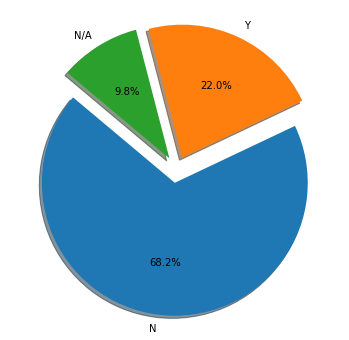

In [106]:
print(shark_2['FATAL(Y/N)'].value_counts())
explode = [0.1 for i in range(len(shark_2['FATAL(Y/N)'].value_counts().index.tolist()))]

chart = plt.gcf()
chart.set_size_inches(6,6)
plt.pie([e for e in shark_2['FATAL(Y/N)'].value_counts()], explode = explode, labels=shark_2['FATAL(Y/N)'].value_counts().index.tolist(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

N      4301
Y      1389
N/A     621
Name: FATAL(Y/N), dtype: int64


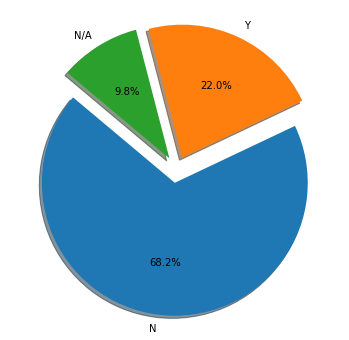

In [107]:
print(shark_2['FATAL(Y/N)'].value_counts())
explode = [0.1 for i in range(len(shark_2['FATAL(Y/N)'].value_counts().index.tolist()))]

chart = plt.gcf()
chart.set_size_inches(6,6)
plt.pie([e for e in shark_2['FATAL(Y/N)'].value_counts()], explode = explode, labels=shark_2['FATAL(Y/N)'].value_counts().index.tolist(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
#vemos que la mayoria de ataques no son mortales

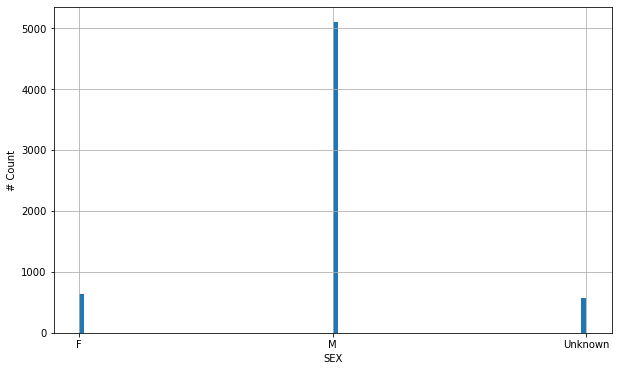

In [108]:
#Tabla con los ataques a Male o Female
plt.figure(figsize=(10, 6))

shark_2.SEX.hist(bins=100)

plt.ylabel('# Count')
plt.xlabel('SEX');

<AxesSubplot:title={'center':'Ataques'}, xlabel='SEX', ylabel='Count'>

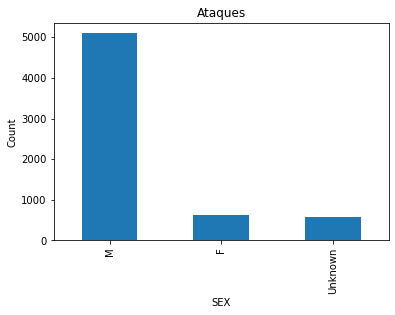

In [109]:
#Tabien se puede hacer de esta otra forma
plt.title('Ataques')
plt.xlabel('SEX')
plt.ylabel('Count')
shark_2['SEX'].value_counts().plot(kind='bar',)

In [110]:
#Creamos una columna donde filtra las filas que contengan la palabra white y el resto otro.
def white_shark(x):
    x = str(x)
    match = re.search(r"[Ww](hite|HITE)", x)
    
    if match:
        return "White Shark"
    else:
        return "Otro"

In [111]:
shark_2["WhiteShark"] = shark_2["SPECIES"].apply(white_shark)
shark_2.WhiteShark.unique()

array(['White Shark', 'Otro'], dtype=object)

In [112]:
white = shark_2[(shark_2['WhiteShark']=='White Shark') & 
                ((shark_2['SEX']=='M') | 
                (shark_2['SEX']=='F'))]


<AxesSubplot:title={'center':'White Shark Attacks'}, xlabel='SEX'>

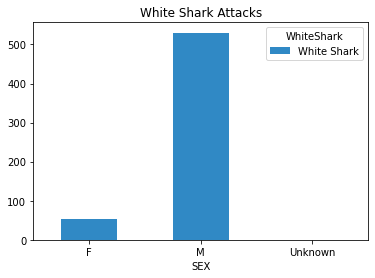

In [113]:
#Creamos un grafico donde solo nos muestre los ataques de tiburones blancos al SEX(M,F)
white.groupby(['SEX','WhiteShark']).size().unstack().plot(kind='bar',
                                                                  stacked=True, rot=0, title="White Shark Attacks", color=["#3089c5","#4bbdcc","#4babbb"])

<AxesSubplot:title={'center':'White Shark Attacks'}, xlabel='FATAL(Y/N)'>

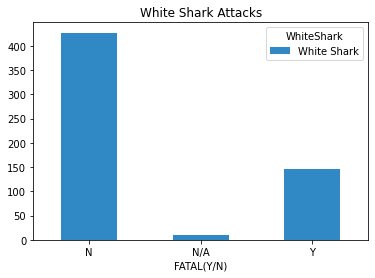

In [114]:
#Creamos un grafico donde solo nos muestre si los ataques de tiburones blancos son fatal o no
white.groupby(['FATAL(Y/N)','WhiteShark']).size().unstack().plot(kind='bar',
                                                                  stacked=True, rot=0, title="White Shark Attacks", color=["#3089c5","#4bbdcc","#4babbb"])

Unprovoked      4595
Provoked         574
Invalid          547
Boat             341
Sea Disaster     239
Unknown           15
Name: TYPE, dtype: int64


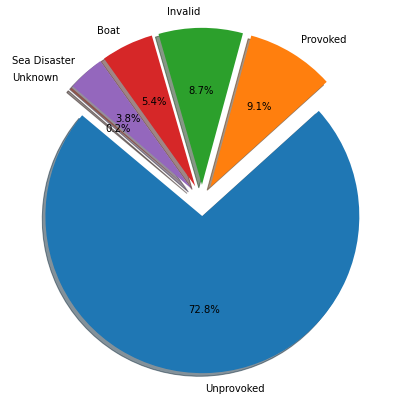

In [115]:
#creamos otro grafico para observar el % de ataques en la columna TYPE
print(shark_2['TYPE'].value_counts())
explode = [0.1 for i in range(len(shark_2['TYPE'].value_counts().index.tolist()))]

chart = plt.gcf()
chart.set_size_inches(7,7)
plt.pie([e for e in shark_2['TYPE'].value_counts()], explode = explode, labels=shark_2['TYPE'].value_counts().index.tolist(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [117]:
shark_2.to_csv('sharkclean.csv', index=False, sep=',') 